K-means inertia & silhouette score

In [1]:
import numpy as np
import pandas as pd

##################################################
###  Important imports for modeling and evaluation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
##################################################


# (To create synthetic data)
from sklearn.datasets import make_blobs

# Visualization package import
import seaborn as sns

In [3]:
# Create random number generator
rng = np.random.default_rng(seed=44)

In [4]:
# Create synthetic data w/ unknown number of clusters
centers = rng.integers(low=3, high=7)
X, y = make_blobs(n_samples=1000, n_features=6, centers=centers, random_state=42)

In [5]:
# Create Pandas dataframe from the data
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5
0,-1.534288,5.467808,-6.945988,1.403934,1.553836,-7.618236
1,-6.681020,6.717808,2.764396,4.460744,-8.286569,10.959708
2,-8.678310,7.825306,3.139699,5.609951,-9.948079,8.072149
3,-6.667385,7.147637,2.145505,4.712937,-9.544708,11.093248
4,-2.753835,-4.209968,0.620345,-7.439505,-4.405723,-2.046149


In [6]:
# Scale the data to standarize it
X_scaled = StandardScaler().fit_transform(X)
X_scaled[:2,:]

array([[-0.03173691,  0.4864719 , -1.32178135,  0.59808997,  1.5703227 ,
        -0.88951855],
       [-1.05006137,  0.68381835,  0.74465777,  1.2564266 , -0.97057774,
         1.92995522]])

In [7]:
# Instantiate model
kmeans3 = KMeans(n_clusters=3, random_state=42)

In [9]:
# Fit model to data
kmeans3.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [10]:
print('Clusters: ', kmeans3.labels_)
print('Inertia: ', kmeans3.inertia_)

Clusters:  [2 0 0 0 1 1 1 0 0 2 1 0 0 2 0 0 0 0 1 1 1 0 0 0 2 2 1 0 0 1 1 0 1 1 2 2 1
 0 0 0 1 0 1 0 0 1 1 2 0 2 1 1 1 2 2 2 1 0 1 2 1 1 1 1 1 1 1 2 1 1 0 1 1 1
 0 1 0 2 2 0 2 0 1 2 1 0 2 2 0 2 0 1 2 0 1 2 1 0 0 1 1 0 0 0 0 0 0 1 1 0 2
 1 0 1 0 0 1 1 2 1 1 1 0 1 1 0 0 1 2 0 2 2 2 1 0 2 2 1 0 1 1 1 0 2 2 2 1 1
 0 1 1 0 1 1 0 0 2 0 2 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 2 0 0 2 2 1 0 1 0 1
 0 2 0 2 0 1 1 1 0 0 0 2 2 0 1 0 0 1 0 1 1 1 1 1 2 1 2 0 0 1 2 2 0 1 1 2 1
 0 0 0 0 1 1 1 0 2 1 2 0 2 0 2 1 1 0 0 0 2 2 1 1 2 2 2 0 0 0 1 1 1 0 0 0 1
 0 1 2 1 0 0 2 2 1 1 0 1 2 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 2 1 0 1 2 2
 1 0 0 1 0 0 0 0 0 0 2 0 2 1 0 0 2 1 1 0 1 0 0 2 0 1 0 0 0 1 1 1 2 2 2 1 2
 2 2 0 0 2 0 2 1 0 1 2 0 2 1 0 1 0 0 0 0 1 1 0 1 0 1 1 1 2 0 0 0 0 0 1 1 2
 1 0 0 1 0 1 1 0 1 0 2 0 0 1 0 1 1 2 0 1 1 1 2 1 1 0 1 0 1 0 2 0 1 0 0 1 1
 2 0 1 1 2 1 1 0 0 0 0 1 0 1 0 0 2 2 1 2 1 1 1 0 0 2 1 0 0 0 1 0 1 0 2 0 1
 2 1 1 1 0 1 2 0 1 2 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 2 1 2 0 1 1 1 1 2 0
 0 1 0 0 2 2 0

Evaluate inertia

This inertia value isn't helpful by itself. We need to compare the inertias of multiple k values. To do this, we'll create a function that fits a K-means model for multiple values of k, calculates the inertia for each k value, and appends it to a list.

In [11]:
# Create a list from 2-10. 
num_clusters = [i for i in range(2, 11)]

def kmeans_inertia(num_clusters, x_vals):
    '''
    Fits a KMeans model for different values of k.
    Calculates an inertia score for each k value.

    Args:
        num_clusters: (list of ints)  - The different k values to try
        x_vals:       (array)         - The training data

    Returns: 
        inertia:      (list)          - A list of inertia scores, one for each \
                                      value of k
    '''

    inertia = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        inertia.append(kms.inertia_)
    
    return inertia

In [12]:
# Calculate inertia for k=2-10
inertia = kmeans_inertia(num_clusters, X_scaled)
inertia

[3686.2501587328,
 1748.1488703079513,
 1124.6368935738392,
 239.65434758718428,
 232.7287150801513,
 224.2967507228998,
 216.22784318026908,
 210.9898998155357,
 202.3018106935965]

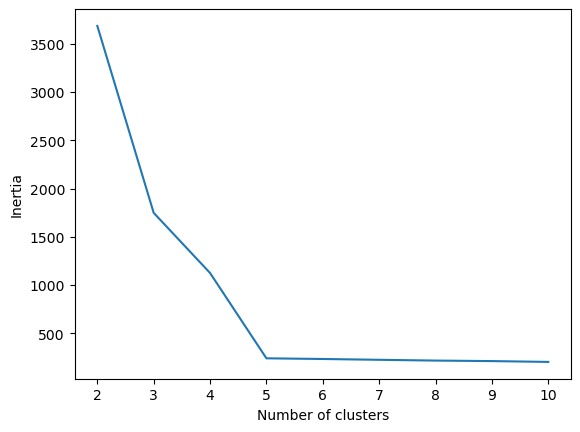

In [13]:
# Create an elbow plot
plot = sns.lineplot(x=num_clusters, y=inertia)
plot.set_xlabel("Number of clusters");
plot.set_ylabel("Inertia");

Evaluate silhouette score

Unlike inertia, silhouette score doesn't have its own attribute that can be called on the model object. To get a silhouette score, we have to use the silhouette_score() function that we imported from sklearn.metrics. You must pass to it two required parameters: your training data and their assigned cluster labels. Let's see what this looks like for the kmeans3 model we created earlier.

In [14]:
# Get silhouette score for kmeans3 model
kmeans3_sil_score = silhouette_score(X_scaled, kmeans3.labels_)
kmeans3_sil_score

0.5815196371994132

In [15]:
def kmeans_sil(num_clusters, x_vals):
    '''
    Fits a KMeans model for different values of k.
    Calculates a silhouette score for each k value

    Args:
        num_clusters: (list of ints)  - The different k values to try
        x_vals:       (array)         - The training data

    Returns: 
        sil_score:    (list)          - A list of silhouette scores, one for each \
                                      value of k
    '''
  
    sil_score = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        sil_score.append(silhouette_score(x_vals, kms.labels_))
    
    return sil_score

In [16]:
# Calculate silhouette scores for k=2-10
sil_score = kmeans_sil(num_clusters, X_scaled)
sil_score

[0.42005966017510427,
 0.5815196371994132,
 0.649060841277744,
 0.7670656870960783,
 0.6376325996351013,
 0.5100290191946069,
 0.4024771015104519,
 0.3998551090636554,
 0.2748795855657769]

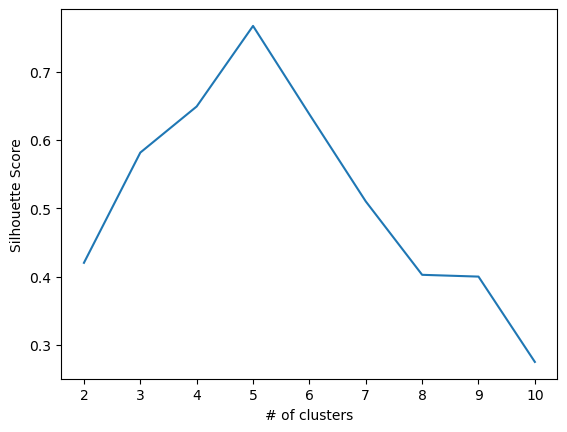

In [17]:
# Create a line plot of silhouette scores 
plot = sns.lineplot(x=num_clusters, y=sil_score)
plot.set_xlabel("# of clusters");
plot.set_ylabel("Silhouette Score");

In [18]:
# Verify our findings (only possible when "correct" number of clusters exists)
centers

5

In [19]:
# Fit a 5-cluster model to the data
kmeans5 = KMeans(n_clusters=5, random_state=42)
kmeans5.fit(X_scaled)

KMeans(n_clusters=5, random_state=42)

In [20]:
print(kmeans5.labels_[:5])
print('Unique labels:', np.unique(kmeans5.labels_))

[2 4 4 4 1]
Unique labels: [0 1 2 3 4]


In [21]:
# Create new column that indicates cluster assignment in original dataframe 
X['cluster'] = kmeans5.labels_
X.head()

,0,1,2,3,4,5,cluster
0,-1.534288,5.467808,-6.945988,1.403934,1.553836,-7.618236,2
1,-6.681020,6.717808,2.764396,4.460744,-8.286569,10.959708,4
2,-8.678310,7.825306,3.139699,5.609951,-9.948079,8.072149,4
3,-6.667385,7.147637,2.145505,4.712937,-9.544708,11.093248,4
4,-2.753835,-4.209968,0.620345,-7.439505,-4.405723,-2.046149,1


Predicting on new data

This is not applicable to all clustering tasks, but it's now possible to take in new data and predict a cluster assignment using our final model.

To demonstrate this, we'll need a new observation, one that was not contained in our original data. We can create this with the random number generator that we used at the beginning of the notebook.

In [22]:
# Create a new observation (for demonstration)
new_observation = rng.uniform(low=-10, high=10, size=6).reshape(1, -1)
new_observation

array([[-4.8377385 , -1.88458544,  9.38367896, -6.7536575 ,  7.14587347,
        -6.73909458]])

In [23]:
# Instantiate the scaler and fit it to the original X data
scaler = StandardScaler().fit(X.iloc[:,:-1])

# Apply the scaler to the new observation
new_observation_scaled = scaler.transform(new_observation)
new_observation_scaled

array([[-0.68535259, -0.67430308,  2.1532887 , -1.15878741,  3.01424824,
        -0.75609599]])

In [24]:
# Predict cluster assignment of new_observation
new_prediction = kmeans5.predict(new_observation_scaled)
new_prediction

array([1])

In [25]:
# Calculate distances between new data and each centroid
distances = kmeans5.transform(new_observation_scaled)
distances

array([[4.55233304, 3.46792667, 4.14567617, 5.11675395, 5.95732403]])